Python setup

In [2]:
import numpy as np
import pandas as pd
import researchpy
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

Data setup

In [3]:
# Read file and select column
STAI_data = pd.read_excel("D:\GitGit\EmoAttenxSound\Results_STAI_DASS21.xlsx", sheet_name = "STAI")
df_STAI = STAI_data[["รหัสอาสาสมัคร (ID)", "รอบที่ทำ", "SUM"]]

# Filter PN and NP
df_STAI_PN = df_STAI[df_STAI["รหัสอาสาสมัคร (ID)"].str.contains("PN") == True].reset_index(drop=True)
df_STAI_NP = df_STAI[df_STAI["รหัสอาสาสมัคร (ID)"].str.contains("NP") == True].reset_index(drop=True)

# For PN
df_STAI_PN_before_P = df_STAI_PN[df_STAI_PN["รอบที่ทำ"] == 1].reset_index(drop=True)
df_STAI_PN_after_P = df_STAI_PN[df_STAI_PN["รอบที่ทำ"] == 2].reset_index(drop=True)
df_STAI_PN_before_N = df_STAI_PN[df_STAI_PN["รอบที่ทำ"] == 3].reset_index(drop=True)
df_STAI_PN_after_N = df_STAI_PN[df_STAI_PN["รอบที่ทำ"] == 4].reset_index(drop=True)

# For NP
df_STAI_NP_before_N = df_STAI_NP[df_STAI_NP["รอบที่ทำ"] == 1].reset_index(drop=True)
df_STAI_NP_after_N = df_STAI_NP[df_STAI_NP["รอบที่ทำ"] == 2].reset_index(drop=True)
df_STAI_NP_before_P = df_STAI_NP[df_STAI_NP["รอบที่ทำ"] == 3].reset_index(drop=True)
df_STAI_NP_after_P = df_STAI_NP[df_STAI_NP["รอบที่ทำ"] == 4].reset_index(drop=True)

# For all
df_STAI_All_before_P = pd.concat([df_STAI_PN_before_P, df_STAI_NP_before_P], ignore_index=True)
df_STAI_All_after_P = pd.concat([df_STAI_PN_after_P, df_STAI_NP_after_P], ignore_index=True)
df_STAI_All_before_N = pd.concat([df_STAI_PN_before_N, df_STAI_NP_before_N], ignore_index=True)
df_STAI_All_after_N = pd.concat([df_STAI_PN_after_N, df_STAI_NP_after_N], ignore_index=True)

<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ROG\AppData\Local\Temp\ipykernel_2872\918453199.py:2: SyntaxWarning: invalid escape sequence '\E'
  STAI_data = pd.read_excel("D:\EmotionalAttention\Results_STAI_DASS21.xlsx", sheet_name = "STAI")


Result

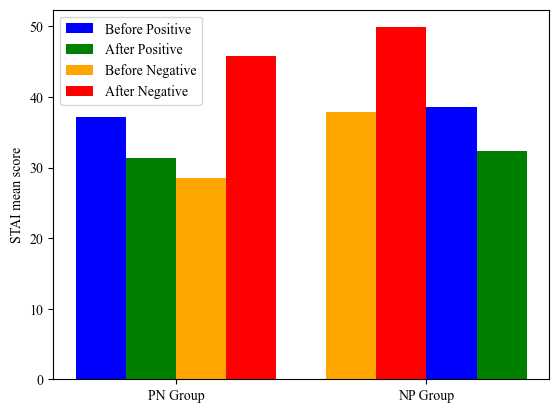

In [4]:
# Dataframe setting for plotting and finding a mean
df_STAI_before_P_mean_PN = [df_STAI_PN_before_P['SUM'].mean()]
df_STAI_before_P_mean_NP = [df_STAI_NP_before_P['SUM'].mean()]
df_STAI_after_P_mean_PN = [df_STAI_PN_after_P['SUM'].mean()]
df_STAI_after_P_mean_NP = [df_STAI_NP_after_P['SUM'].mean()]
df_STAI_before_N_mean_PN = [df_STAI_PN_before_N['SUM'].mean()]
df_STAI_before_N_mean_NP = [df_STAI_NP_before_N['SUM'].mean()]
df_STAI_after_N_mean_PN = [df_STAI_PN_after_N['SUM'].mean()]
df_STAI_after_N_mean_NP = [df_STAI_NP_after_N['SUM'].mean()]

# Calculate standard deviations
std_before_P_mean_PN = np.std([df_STAI_PN_before_P['SUM'].mean(), df_STAI_NP_before_P['SUM'].mean()])
std_after_P_mean_PN = np.std([df_STAI_PN_after_P['SUM'].mean(), df_STAI_NP_after_P['SUM'].mean()])
std_before_N_mean_PN = np.std([df_STAI_PN_before_N['SUM'].mean(), df_STAI_NP_before_N['SUM'].mean()])
std_after_N_mean_PN = np.std([df_STAI_PN_after_N['SUM'].mean(), df_STAI_NP_after_N['SUM'].mean()])

plt.rcParams['font.family'] = 'Times New Roman'
categories = ["PN Group", "NP Group"]
bar_width = 0.2

# Grouped bar plot dataframe
df_STAI_before_P_plot = [df_STAI_PN_before_P['SUM'].mean(), df_STAI_NP_before_N['SUM'].mean()]
df_STAI_after_P_plot = [df_STAI_PN_after_P['SUM'].mean(), df_STAI_NP_after_N['SUM'].mean()]
df_STAI_before_N_plot = [df_STAI_PN_before_N['SUM'].mean(), df_STAI_NP_before_P['SUM'].mean()]
df_STAI_after_N_plot = [df_STAI_PN_after_N['SUM'].mean(), df_STAI_NP_after_P['SUM'].mean()]

# Plotting the grouped bar plot
bar_width = 0.2
bar_positions = np.arange(len(categories))

# Before Positive
plt.bar(bar_positions - 1.5*bar_width, [df_STAI_before_P_mean_PN[0], df_STAI_before_N_mean_NP[0]], width=bar_width, label='Before Positive', color=['blue', 'orange'])
# After Positive
plt.bar(bar_positions - 0.5*bar_width, [df_STAI_after_P_mean_PN[0], df_STAI_after_N_mean_NP[0]], width=bar_width, label='After Positive', color=['green', 'red'])
# Before Negative
plt.bar(bar_positions + 0.5*bar_width, [df_STAI_before_N_mean_PN[0], df_STAI_before_P_mean_NP[0]], width=bar_width, label='Before Negative', color=['orange', 'blue'])
# After Negative
plt.bar(bar_positions + 1.5*bar_width, [df_STAI_after_N_mean_PN[0], df_STAI_after_P_mean_NP[0]], width=bar_width, label='After Negative', color=['red', 'green'])

# plt.xlabel("Order")
plt.ylabel("STAI mean score")
plt.xticks(bar_positions, categories)
plt.legend()

plt.show()

NameError: name 'std_before_P_mean_NP' is not defined

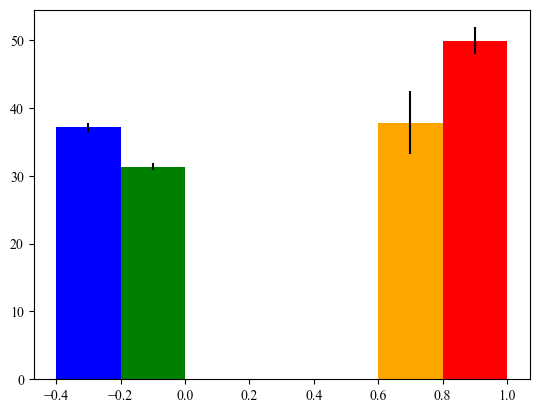

In [5]:
# Dataframe setting for plotting and finding a mean
df_STAI_before_P_mean_PN = [df_STAI_PN_before_P['SUM'].mean()]
df_STAI_before_P_mean_NP = [df_STAI_NP_before_P['SUM'].mean()]
df_STAI_after_P_mean_PN = [df_STAI_PN_after_P['SUM'].mean()]
df_STAI_after_P_mean_NP = [df_STAI_NP_after_P['SUM'].mean()]
df_STAI_before_N_mean_PN = [df_STAI_PN_before_N['SUM'].mean()]
df_STAI_before_N_mean_NP = [df_STAI_NP_before_N['SUM'].mean()]
df_STAI_after_N_mean_PN = [df_STAI_PN_after_N['SUM'].mean()]
df_STAI_after_N_mean_NP = [df_STAI_NP_after_N['SUM'].mean()]

# Calculate standard deviations
std_before_P_mean_PN = np.std([df_STAI_PN_before_P['SUM'].mean(), df_STAI_NP_before_P['SUM'].mean()])
std_after_P_mean_PN = np.std([df_STAI_PN_after_P['SUM'].mean(), df_STAI_NP_after_P['SUM'].mean()])
std_before_N_mean_PN = np.std([df_STAI_PN_before_N['SUM'].mean(), df_STAI_NP_before_N['SUM'].mean()])
std_after_N_mean_PN = np.std([df_STAI_PN_after_N['SUM'].mean(), df_STAI_NP_after_N['SUM'].mean()])

plt.rcParams['font.family'] = 'Times New Roman'
categories = ["PN Group", "NP Group"]
bar_width = 0.2

# Grouped bar plot dataframe
df_STAI_before_P_plot = [df_STAI_PN_before_P['SUM'].mean(), df_STAI_NP_before_N['SUM'].mean()]
df_STAI_after_P_plot = [df_STAI_PN_after_P['SUM'].mean(), df_STAI_NP_after_N['SUM'].mean()]
df_STAI_before_N_plot = [df_STAI_PN_before_N['SUM'].mean(), df_STAI_NP_before_P['SUM'].mean()]
df_STAI_after_N_plot = [df_STAI_PN_after_N['SUM'].mean(), df_STAI_NP_after_P['SUM'].mean()]

# Plotting the grouped bar plot
bar_width = 0.2
bar_positions = np.arange(len(categories))

# Before Positive
plt.bar(bar_positions - 1.5*bar_width, [df_STAI_before_P_mean_PN[0], df_STAI_before_N_mean_NP[0]],
        yerr=[std_before_P_mean_PN, std_before_N_mean_PN],
        width=bar_width, label='Before Positive', color=['blue', 'orange'])
# After Positive
plt.bar(bar_positions - 0.5*bar_width, [df_STAI_after_P_mean_PN[0], df_STAI_after_N_mean_NP[0]],
        yerr=[std_after_P_mean_PN, std_after_N_mean_PN],
        width=bar_width, label='After Positive', color=['green', 'red'])
# Before Negative
plt.bar(bar_positions + 0.5*bar_width, [df_STAI_before_N_mean_PN[0], df_STAI_before_P_mean_NP[0]],
        yerr=[std_before_N_mean_PN, std_before_P_mean_NP],
        width=bar_width, label='Before Negative', color=['orange', 'blue'])
# After Negative
plt.bar(bar_positions + 1.5*bar_width, [df_STAI_after_N_mean_PN[0], df_STAI_after_P_mean_NP[0]],
        yerr=[std_after_N_mean_PN, std_after_P_mean_NP],
        width=bar_width, label='After Negative', color=['red', 'green'])

plt.xlabel("Order")
plt.ylabel("STAI mean score")
plt.xticks(bar_positions, categories)
plt.legend()

plt.show()


In [ ]:
# T-test analysis

des_PN_P, res_PN_P = researchpy.ttest(df_STAI_PN_before_P["SUM"], df_STAI_PN_after_P["SUM"], paired = True)
des_PN_N, res_PN_N = researchpy.ttest(df_STAI_PN_before_N["SUM"], df_STAI_PN_after_N["SUM"], paired = True)
des_NP_P, res_NP_P = researchpy.ttest(df_STAI_NP_before_P["SUM"], df_STAI_NP_after_P["SUM"], paired = True)
des_NP_N, res_NP_N = researchpy.ttest(df_STAI_NP_before_N["SUM"], df_STAI_NP_after_N["SUM"], paired = True)
des_All_P, res_All_P = researchpy.ttest(df_STAI_All_before_P["SUM"], df_STAI_All_after_P["SUM"], paired = True)
des_All_N, res_All_N = researchpy.ttest(df_STAI_All_before_N["SUM"], df_STAI_All_after_N["SUM"], paired = True)

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:302: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SUM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:409: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Difference (SUM - SUM) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\ttest.py:302: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'SUM' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

c:\Users\ROG\AppData\Local\Programs\Python\Pytho

In [ ]:
# T-test table
print(res_All_N)
print(des_All_N)
print("\n")
print(res_All_P)
print(des_All_P)

       Paired samples t-test  results
0  Difference (SUM - SUM) =  -14.7333
1      Degrees of freedom =   29.0000
2                       t =   -5.6925
3   Two side test p value =    0.0000
4  Difference < 0 p value =    0.0000
5  Difference > 0 p value =    1.0000
6               Cohen's d =   -1.1768
7               Hedge's g =   -1.1616
8          Glass's delta1 =   -1.3721
9        Point-Biserial r =   -0.7264
  Variable     N       Mean         SD        SE  95% Conf.   Interval
0      SUM  30.0  33.133333  10.737409  1.960374  29.123919  37.142748
1      SUM  30.0  47.866667  14.301515  2.611087  42.526393  53.206940
2     diff  30.0 -14.733333  14.176069  2.588184 -20.026764  -9.439902


       Paired samples t-test  results
0  Difference (SUM - SUM) =    6.0000
1      Degrees of freedom =   29.0000
2                       t =    3.0423
3   Two side test p value =    0.0049
4  Difference < 0 p value =    0.0025
5  Difference > 0 p value =    0.9975
6               Cohen's d =   

Not in use

In [ ]:

# Find t-test
from scipy.stats import ttest_rel
t_test_PN_P = ttest_rel(df_STAI_PN_before_P['SUM'], df_STAI_PN_after_P['SUM'], nan_policy='omit')
t_test_PN_N = ttest_rel(df_STAI_PN_before_N['SUM'], df_STAI_PN_after_N['SUM'], nan_policy='omit')
t_test_NP_P = ttest_rel(df_STAI_NP_before_P['SUM'], df_STAI_NP_after_P['SUM'], nan_policy='omit')
t_test_NP_N = ttest_rel(df_STAI_NP_before_N['SUM'], df_STAI_NP_after_N['SUM'], nan_policy='omit')
t_test_All_P = ttest_rel(df_STAI_All_before_P['SUM'], df_STAI_All_after_P['SUM'], nan_policy='omit')
t_test_All_N = ttest_rel(df_STAI_All_before_N['SUM'], df_STAI_All_after_N['SUM'], nan_policy='omit')